## MultiLayer Perceptron

### Implementing a Neural Network from scratch

- Understanding the MLP architecture
- Understanding Forward Propagation, Backpropagation, Activation Functions and Loss fn
- Making predictions and evaluating performance on various datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

### Generating the Data

In [2]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
print(X.shape)
print(Y.shape)
plt.style.use('default')

(500, 2)
(500,)


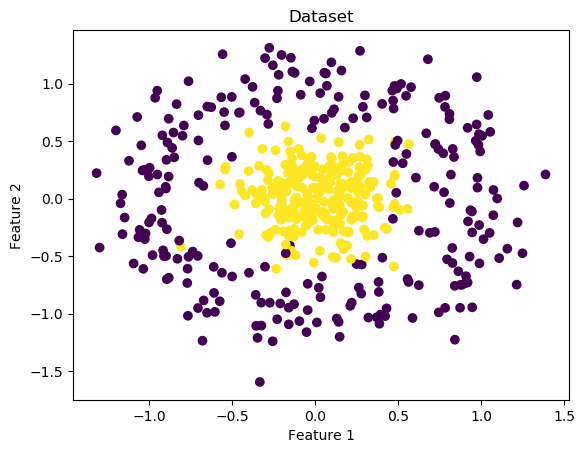

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
## Model Parameters

INPUT_SIZE = 2 ## no_of_features
LAYERS = [10, 5] ## No.of Neurons in each hidden layer
OUTPUT_SIZE = 2 ## No.of Classes

In [5]:
def softmax(a):
    '''Implementing the Softmax layer function'''
    
    e_pa = np.exp(a)
    smax = e_pa/np.sum(e_pa, axis=1, keepdims=True)
    return smax

In [6]:
class NeuralNetwork:
    
    def __init__(self, input_size, layers, output_size):
        '''Constructor to initialize the members of the class'''
        
        model = {} ## Dictionary to store the parameters of the network
        np.random.seed(0)
                
        ## Iterate over the layers and store the parameters in the dictionary for each layer
        for lx in range(len(layers)):
            
            idx = str(lx+1)
            
            if lx==0:
                model['W'+idx] = np.random.randn(input_size, layers[lx])
                model['b'+idx] = np.zeros((1, layers[lx]))
            
            else:
                model['W'+idx] = np.random.randn(layers[lx-1], layers[lx])
                model['b'+idx] = np.zeros((1, layers[lx]))
        
        idx = str(len(layers)+1)
        model['W'+idx] = np.random.randn(layers[-1], output_size)
        model['b'+idx] = np.zeros((1, output_size))
        
        self.model = model
        self.activation_outputs = None
        
    def forward(self, X):
        '''Implementation of Forward Propagation'''
        
        Z = []
        A = []
        layers = int(len(self.model)/2) ## Getting total no.of layers including Output layer
        
        for ix in range(layers):
            
            idx = str(ix+1)
            W = self.model['W'+idx]
            b = self.model['b'+idx]
            
            if ix==0:
                a = X
            else:
                a = A[ix-1]
                
            z = np.dot(a, W) + b
            a_ = np.tanh(z)  ## Activation function -> tanh
            
            Z.append(z)
            A.append(a_)
        
        y_ = softmax(Z[-1])  ## Translate to probabilities for classes
        A[-1] = y_
        
        self.activation_outputs = A
        return y_
    
    def backward(self, X, Y, learning_rate=0.001):
        '''Implementation of Backpropagation using Binary Cross Entropy as loss function'''
        
        activations = self.activation_outputs
        M = X.shape[0]  ## No.of examples
        
        gradients_w = [] ## Store weight gradients for each layer
        gradients_b = [] ## Store bias gradients for each layer
        deltas = [] ## Store delta values for each layer
        
        layers = int(len(self.model)/2) ## Getting total no.of layers including Output Layer
        
        for ix in range(layers,0,-1):
            
            a = activations[ix-1]
            idx = str(ix+1)
            
            if ix==1:
                a_prev = X
            else:
                a_prev = activations[ix-2]
            
            ## Gradients for output layer
            if ix==layers:
                delta = a - Y
                dw = np.dot(a_prev.T, delta)
                db = np.sum(delta, axis=0)
            
            else:
                delta = (1-np.square(a))*np.dot(deltas[0], self.model['W'+idx].T)
                dw = np.dot(a_prev.T, delta)
                db = np.sum(delta, axis=0)
                
            deltas.insert(0,delta)
            gradients_w.insert(0,dw)
            gradients_b.insert(0,db)
        
        for ix in range(layers):
            idx = str(ix+1)
            self.model['W'+idx] -= learning_rate*gradients_w[ix]
            self.model['b'+idx] -= learning_rate*gradients_b[ix]
            
    def predict(self, X):
        '''Prediction for a given value of X'''
        y_out = self.forward(X)
        return np.argmax(y_out, axis=1)
    
    def summary(self):
        '''Prints the summary of the model - Shapes of all Parameters in every layer'''
        
        layers = int(len(self.model)/2) ## Getting total no.of layers including Output Layer
        
        for ix in range(layers):
            idx = str(ix+1)
            print("W"+idx, self.model["W"+idx].shape)
            print("b"+idx, self.model["b"+idx].shape)
            print("A"+idx, self.activation_outputs[ix].shape)

### Loss Function

In [7]:
def loss(Y_oht, probs):
    '''Computing the loss using Cross Entropy function'''
    
    val = -np.mean(Y_oht*np.log(probs))
    return val

def one_hot(Y, depth):
    '''One-Hot encoding of the Y Label vector. Variable depth = no.of classes'''
    
    M = Y.shape[0]  ## No.of samples
    Y_oht = np.zeros((M, depth))
    Y_oht[np.arange(M), Y] = 1
    return Y_oht

### Training the Model

In [8]:
model = NeuralNetwork(INPUT_SIZE, LAYERS, OUTPUT_SIZE)

In [9]:
def train(X, Y, model, epochs=1000, learning_rate=0.0001):
    '''Train the model and visualise the loss'''
    
    training_loss = [] ## To store the loss values for each iteration
    classes = X.shape[1]
    Y_oht = one_hot(Y, classes) ## One hot encoding of the labels for every example
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)  ## Get the predictions from forward propagation
        loss_val = loss(Y_oht, Y_)
        training_loss.append(loss_val)
        model.backward(X, Y_oht, learning_rate)  ## Backpropagation to modify the paramters
        
    return training_loss

In [10]:
losses = train(X, Y, model)  ## Training the Model

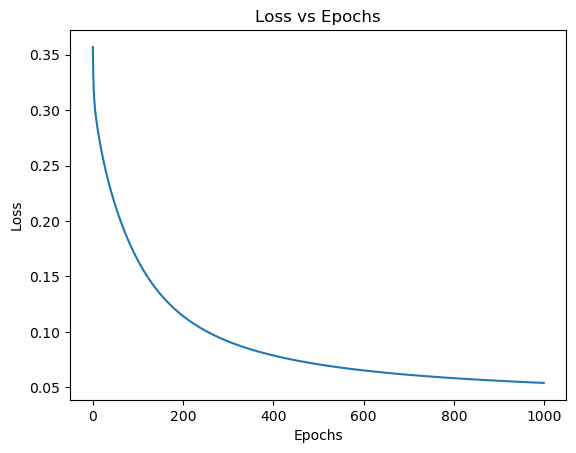

In [11]:
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [12]:
model.summary()  ## Summary of Model Parameters

W1 (2, 10)
b1 (1, 10)
A1 (500, 10)
W2 (10, 5)
b2 (1, 5)
A2 (500, 5)
W3 (5, 2)
b3 (1, 2)
A3 (500, 2)


### Calculating Training Accuracy

In [13]:
outputs = model.predict(X)

training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 97.4000


### Visualizing Decision Boundary

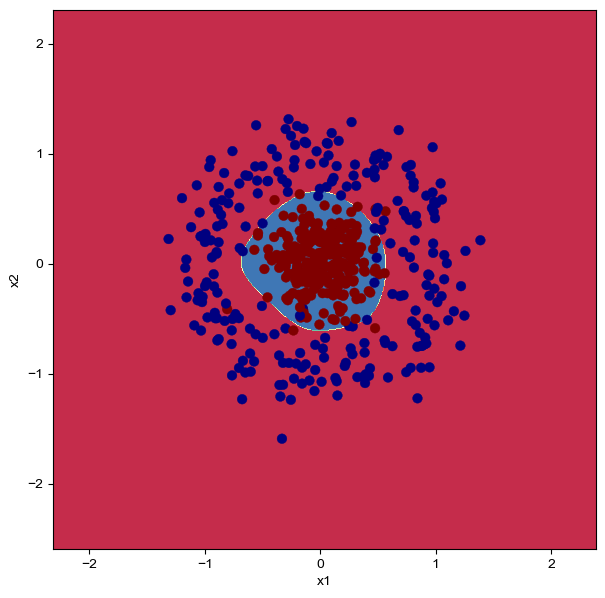

In [14]:
from visualize import plot_decision_boundary

plt.figure(figsize=(7,7))
plot_decision_boundary(lambda x:model.predict(x),X,Y)

### Testing on Other Non Linear Datasets

In [115]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [116]:
def load_dataset(dataset):
    '''Create a dummy dataset based on the input type'''
    
    if dataset=='moons':
        X,Y = make_moons(n_samples=500, noise=0.2, random_state=1)
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
    return X, Y

Training Acc 1.0000


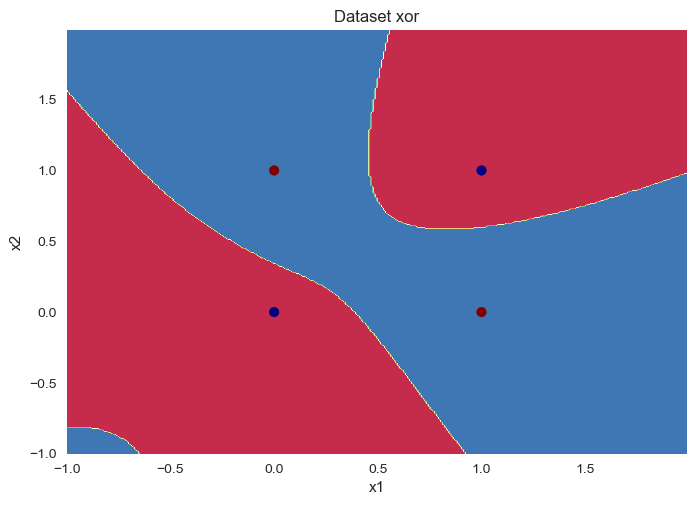

Training Acc 0.9620


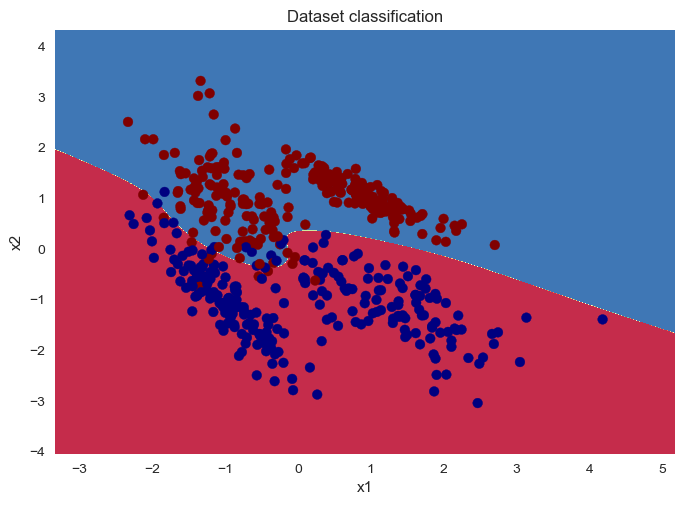

Training Acc 0.9780


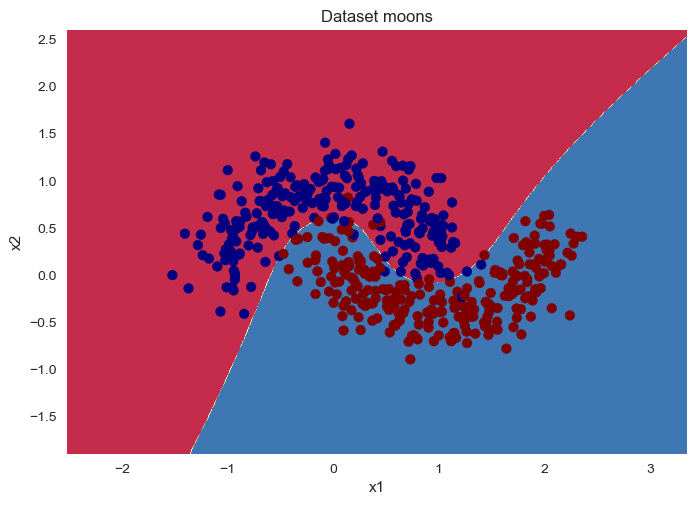

Training Acc 0.9700


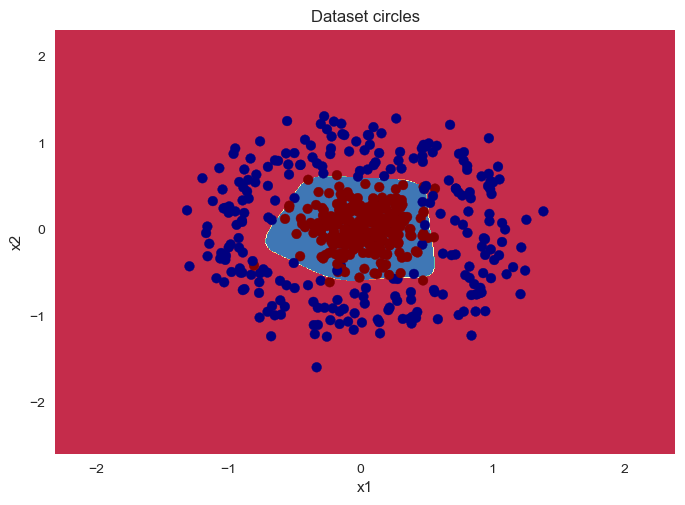

In [117]:
datasets = ["xor","classification","moons","circles"]

for d in datasets:
    X,Y = load_dataset(d)
    model = NeuralNetwork(INPUT_SIZE, LAYERS, OUTPUT_SIZE)
    losses = train(X, Y, model, epochs=1000, learning_rate=0.001)
    outputs = model.predict(X)
    
    ## Calculate Training Accuracy
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Acc %.4f"%training_accuracy)
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()